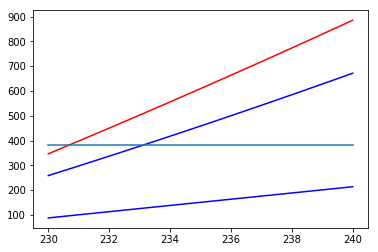

284.0774746290154
380.6536548386031
0.048956314390049396
271.3172113790322


In [19]:
import numpy as np
import matplotlib.pyplot as plt

#m in kg (wikipedia)
m = 500
# SA - rough surface area estimate (m**2)
SA = 6
#Kleiber's Law BMR
BMR_k = 3.6*m**(3/4)

BMR = BMR_k

#One Layer Conduction Model
T_body = 310
T_air = 223
delta_t = T_air - T_body
kappa_f = 0.0357
#https://thermtest.com/applications/fur-thermal-conductivity-hfm
delta_x = -(kappa_f*delta_t*SA)/BMR

#Radiation Loss in Water
T_water = 271 #K
sigma = 5.67*10**(-8)
epsilon = 1

T_bear = (BMR/(SA*sigma)+T_water**4)**(1/4)

#Heat Loss in Water (Surface Heat Transfer)
# h_s of water in free convection ranges from 100-1000
h_sw = 200
T_fur = T_water + (BMR/(h_sw * SA))

# Model 1: No Convection
# conduction
rho_p = 1000
V= m/rho_p
r = (3*V*np.pi/4)**(1/3)
SA_2 = 4*np.pi*r**2
paw_area = .2
kappa_2 = 0.050 * paw_area/(SA_2)
#T_1 = T_air + BMR/(4*np.pi*r*kappa_2)

T_1 = np.linspace(230, 240, 100)
p_rad = sigma*4*np.pi*(r**2)*(T_1**4 - T_air**4)
#p_cond = (T_1-T_air)*4*np.pi*kappa_2
p_cond = (T_1-T_air)*4*np.pi*1
p_tot = p_rad+p_cond
y = T_1*0 + BMR

plt.plot(T_1, p_rad, 'b')
plt.plot(T_1, p_cond, 'b')
plt.plot(T_1, p_tot, 'r')
plt.plot(T_1, y)
plt.show()
print(T_bear)
print(BMR)
print(delta_x)
print(T_fur)


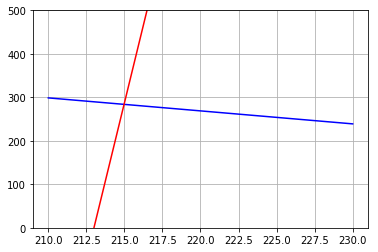

In [43]:
import numpy as np
import matplotlib.pyplot as plt

#heat transfer thru fur (3-layers)
k_1 = 0.20
k_2 = 0.040
k_3 = 0.063
L_1 = 0.07
L_2 = 0.03
L_3 = 0.10
T_air = 213
SA = 6
T_core = 310

T_fur = np.linspace(210, 230, 500)

q_1 = SA * (k_1*k_2*k_3)/(L_1*L_2*L_3)*(T_core - T_fur)/(k_1/L_1 + k_2/L_2+k_3/L_3)

# Heat transfer from surface

epsilon = 1
sigma = 5.67*10**(-8)
rho_p = 1000
V= m/rho_p
r = (3*V*np.pi/4)**(1/3)
k_4 = 0.5 #W/mk (Thermal conductivity of snow)
wv = 2
h_s = 14.8*wv**(0.69)

P_rad = epsilon * sigma * SA * (T_fur - T_air)**4
P_cond = (T_fur - T_air)/(4*np.pi*r*k_4)
P_conv = SA*h_s*(T_fur - T_air)
#q_2 = epsilon * sigma * SA * (T_fur - T_air)**4 + (T_fur - T_air)/(4*np.pi*r*k_4) + SA*h_s*(T_fur - T_air)
q_2 = P_rad + P_cond + P_conv
q_21 = P_rad + P_cond
plt.plot(T_fur, q_1, 'b')
plt.plot(T_fur, q_2, 'r')
#plt.plot(T_fur, q_21, 'g')
plt.ylim(0, 500)
plt.grid(axis='both')



In [4]:
import numpy as np
import matplotlib.pyplot as plt

#heat transfer thru fur (3-layers)
k_1 = 0.20
k_2 = 0.040
k_3 = 0.063
L_1 = 0.10
L_2 = 0.03
L_3 = 0.10
T_air = 200
SA = 6
T_core = 310

T_fur = np.linspace(195, 220, 500)

q_1 = SA * (k_1*k_2*k_3)/(L_1*L_2*L_3)*(T_core - T_fur)/(k_1/L_1 + k_2/L_2+k_3/L_3)

# Heat transfer from surface

epsilon = 1
sigma = 5.67*10**(-8)
rho_p = 1000
V= m/rho_p
r = (3*V*np.pi/4)**(1/3)
k_4 = 0.5 #W/mk (Thermal conductivity of snow)
wv = 10
h_s = 14.8*wv**(0.69)


q_2 = epsilon * sigma * SA * (T_fur - T_air)**4 + (T_fur - T_air)/(4*np.pi*r*k_4) + SA*h_s*(T_fur - T_air)

plt.plot(T_fur, q_1, 'b')
#plt.plot(T_fur, q_2, 'r')
plt.ylim(0, 500)
plt.grid(axis='both')



NameError: name 'm' is not defined

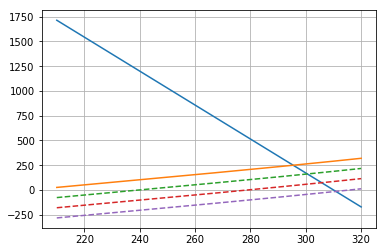

In [54]:
import numpy as np
import matplotlib.pyplot as plt
m = 400
BMR = 3.6*m**(3/4)

#heat transfer thru fur (3-layers)
k_1 = 0.20
k_2 = 0.040
k_3 = 0.063
L_1 = 0.07
L_2 = 0.03
L_3 = 0.10
T_air = 200
SA = 6
T_core = 310

T_fur = np.linspace(180, 280, 500)
T_skin = np.linspace(210, 320, 500)
#q_1 = SA * (k_1*k_2*k_3)/(L_1*L_2*L_3)*(T_core - T_fur)/(k_1/L_1 + k_2/L_2+k_3/L_3)

epsilon = 1
sigma = 5.67*10**(-8)
rho_p = 1000
V= m/rho_p
r = (3*V*np.pi/4)**(1/3)
k_4 = 0.5 #W/mk (Thermal conductivity of snow)
wv = 5
h_s = 14.8*wv**(0.69)


# Heat transfer to skin
q_1 = SA * k_1 * (T_core-T_skin)/L_1

#####
#T_skin = 292
T_f1 = 200
T_f2 = 240
T_f3 = 280
T_f4 = 320
#Heat transfer to fur
P_cond1 = SA*(k_2/L_2)*(k_3/L_3)*(T_skin - T_f1)/((k_2/L_2 + k_3/L_3))
P_rad2 = epsilon*sigma*(T_skin - T_air)**(4)
q_21 = P_cond1 + P_rad2

P_cond2 = SA*(k_2/L_2)*(k_3/L_3)*(T_skin - T_f2)/((k_2/L_2 + k_3/L_3))
q_22 = P_cond2 + P_rad2

P_cond3 = SA*(k_2/L_2)*(k_3/L_3)*(T_skin - T_f3)/((k_2/L_2 + k_3/L_3))
q_23 = P_cond3 + P_rad2

P_cond4 = SA*(k_2/L_2)*(k_3/L_3)*(T_skin - T_f4)/((k_2/L_2 + k_3/L_3))
q_24 = P_cond4 + P_rad2

#Heat transfer to Env.
P_conde = (T_fur - T_air)/(4*np.pi*r*k_4)
P_conve = SA*h_s*(T_fur - T_air)
q_3 = P_conde + P_conve


plt.plot(T_skin,q_1)
plt.plot(T_skin,q_21, '-')
plt.plot(T_skin,q_22, '--')
plt.plot(T_skin,q_23, '--')
plt.plot(T_skin,q_24, '--')
#plt.ylim(0, 500)
plt.grid(axis='both')



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Assume BMR
m = 500
SA = 6
BMR = 3.6*m**(3/4)

k_1 = 0.2
k_2 = 0.040
k_3 = 0.040
L_1 = 0.05
L_2 = 0.05
L_3 = 0.05
T_air = 213
T_core = 310


T_fur1 = T_core - BMR*(k_1/L_1+k_2/L_2+k_3/L_3)*(L_1*L_2*L_3)/(k_1*k_2*k_3*SA)

# 0.03 => 3% SA
k_4 = 0.5 #W/mk (Thermal conductivity of snow)
T_fur2 = T_air + (BMR - P_rad)/(4*np.pi*r*(k_4*0.03))

T_range = np.linspace(220, 300, 500)









At an temperature of -223 and wind speed 10:
Body heat loss = 2587.221490917102
Legs heat loss = 4717.685717458042
Total heat loss = 7304.9072083751435
Kleibers BMR = 351.73200371362054
Bear would need to burn 15953.748079529307 grams of fat per day to maintain body heat
Using the more realistic estimation of 1.6 times kleibers law BMR, BMR = 562.7712059417929, the bear would need to burn 6742.136002433351 grams of fat


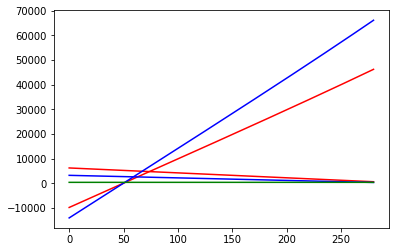

In [123]:
import numpy as np
import matplotlib.pyplot as plt

#skin surface
sa_s = 5.39
#fur surface area
fur_sa = 6.59
m = 450 #kg
T_core = 310
T_env = 50
T_c = T_env-273
v =  10 #wind speed
n = 100000
T_fur = np.linspace(0,280,n)

# body
m_body = .59 * m
SA_b = .59 * fur_sa

# fat layer
k_1 = .2
L_1 = .114
#####

# skin
k_2 = .40 ######### ESTIMATION
L_2 = .02

# fur
k_3 = .0628 + (.07*v*(.0628))
L_3 = .06

# core to fur
q_1 = SA_b * (k_1*k_2*k_3)/(L_1*L_2*L_3)*(T_core - T_fur)/(k_1/L_1 + k_2/L_2+k_3/L_3)

# fur to env
sigma = 5.67*10**-8
q_rad = SA_b*sigma*(T_fur**4 - T_env**4)

h = 14.8*v**(.69)
q_conv = SA_b * (T_fur - T_env) * h

q_2 = q_rad + q_conv

###########################################
#Legs
###########################################

T_furL = np.linspace(200,300,n)

# legs

m_leg = .1025*m
SA_leg = .1025*fur_sa

# leg fat layer
k_1L = .2
L_1L = .035
####

# leg skin
k_2L = .40 ######### ESTIMATION
L_2L = .02

# leg fur
k_3L = .0628 + (.07*v*(.0628))
L_3L = .06

q_1L = 4*SA_leg * (k_1L*k_2L*k_3L)/(L_1L*L_2L*L_3L)*(T_core - T_fur)/(k_1L/L_1L + k_2L/L_2L+k_3L/L_3L)


# fur to env

# conduction thru paws #############
r_paw = 0.15
k_snow = 0.3 #################varies with snow density
q_condL = 4*2*np.pi*r_paw*k_snow *(T_fur - T_env)

#Radiation
sigma = 5.67*10**-8
q_radL = 4*SA_leg*sigma *(T_fur**4 - T_env**4)

#Convenction
h = 14.8*v**(.69)
q_convL = 4*SA_leg * (T_fur - T_env) * h

q_2L = q_condL + q_radL + q_convL

plt.plot(T_fur, q_1L, 'r')
plt.plot(T_fur, q_2L, 'r')


K = 3.6*m**(3/4)
BMR = T_fur*0 + K
plt.plot(T_fur, q_1, 'b')
plt.plot(T_fur, q_2, 'b')
plt.plot(T_fur, BMR, 'g')


z = np.linspace(0,(n-1),n)

def inter(a,b):
    for x in z:
        if abs(a[int(x)] - b[int(x)]) < 1:
            return (a[int(x)])
                 
                  
p_b = inter(q_1, q_2)
p_l = inter(q_1L, q_2L)
print("At an temperature of {} and wind speed {}:".format(T_c, v))
print("Body heat loss = {}".format(p_b))
print("Legs heat loss = {}".format(p_l))
p = p_b + p_l
print("Total heat loss = {}".format(p))
print("Kleibers BMR = {}".format(K))
BMR_2 = K*1.6

loss = p - K
grams = loss / 37656 * 86400
print("Bear would need to burn {} grams of fat per day to maintain body heat".format(grams))
loss2 = p - BMR_2
grams2 = loss2 / 37656 * 86400
print("Using the more realistic estimation of 1.6 times kleibers law BMR, BMR = {}, the bear would need to burn {} grams of fat".format(BMR_2,loss2))

T_range = np.linspace(100,300,n)



In [39]:
import numpy as np
n = np.linspace(0,10,11)
c = np.linspace(10,0,11)
z = np.linspace(0,10,11)
for x in z:
    if abs(n[int(x)] - c[int(x)]) < 1:
        print(n[int(x)])
print(n)
print(c)
    

5.0
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]


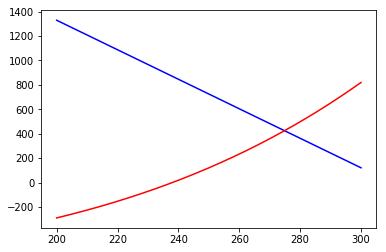

In [21]:
import numpy as np
import matplotlib.pyplot as plt

#skin surface
sa_s = 5.39
#fur surface area
fur_sa = 6.59
m = 450 #kg
T_core = 310
T_env = 238
v =  0 #wind speed
T_furL = np.linspace(200,300,500)

# legs

m_leg = .1025*m
SA_leg = .1025*fur_sa

# leg fat layer
k_1L = .2
L_1L = .035
####

# leg skin
k_2L = .40 ######### ESTIMATION
L_2L = .02

# leg fur
k_3L = .0628 + (.07*v*(.0628))
L_3L = .06

q_1L = 4*SA_leg * (k_1L*k_2L*k_3L)/(L_1L*L_2L*L_3L)*(T_coreL - T_furL)/(k_1L/L_1L + k_2L/L_2L+k_3L/L_3L)


# fur to env

# conduction thru paws #############
r_paw = 0.15
k_snow = 0.3 #################varies with snow density
q_condL = 4*2*np.pi*r_paw*k_snow *(T_fur - T_env)

#Radiation
sigma = 5.67*10**-8
q_radL = 4*SA_leg*sigma *(T_fur**4 - T_env**4)

#Convenction
h = 14.8*v**(.69)
q_convL = 4*SA_leg * (T_fur - T_env) * h

q_2L = q_condL + q_radL + q_convL

plt.plot(T_fur, q_1L, 'b')
plt.plot(T_fur, q_2L, 'r')

